# Symbolic Computing with SymPy

This notebook was developed by Joel Meyers from the official SymPy tutorial at http://docs.sympy.org/latest/tutorial/index.htmllesson (see https://github.com/certik/scipy-2013-tutorial/tree/master/tutorial_exercises for more materials). I have made some minor modifications.

A working version of SymPy can be accessed from anywhere by going to http://live.sympy.org

To get started with SymPy, we need to import the library.  If the library is not avaialble, you need to run `pip install sympy --user` in your terminal.

In [1]:
%pylab inline
import sympy

from sympy import *
from sympy import init_printing

def custom_latex_printer(exp,**options):
    from google.colab.output._publish import javascript
    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"
    javascript(url=url)
    return sympy.printing.latex(exp,**options)
init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)




Populating the interactive namespace from numpy and matplotlib


One advantage of a Computer Algebra System (CAS) such as SymPy is that irrational numbers are treated exactly, rather than approximately.

In [2]:
sqrt(8)

2*sqrt(2)

Compare this to what we would have gotten using the definition of `sqrt()` in the math package.

In [3]:
import math
math.sqrt(8)

2.8284271247461903

Just like elsewhere in Python, one needs to be careful about how division is treated due to the assumed data types of the input.  Try evaluating the follwing cells.

In [5]:
1/3

In [6]:
1./3

In [7]:
S(1)/3

Though these expressions look similar, they give different results.  The result of the first cell even depends on your version of Python.  The third cell coverts the 1 from an `int` to a SymPy object, and returns a SymPy `Rational`.  You can always check your data type with the `type()` command.

In [8]:
type(1)

int

In [9]:
type(1.)

float

In [10]:
type(S(1))

sympy.core.numbers.One

In [11]:
type(S(1)/3)

sympy.core.numbers.Rational

The main advantage of any CAS, however is its ability to deal with variables, which are called symobls in SymPy.  We first have to define symbols that will then be treated as SymPy objects.

In [12]:
x, y, z, t, nu, sigma, a, r, s, Rc, rp = symbols('x y z t nu sigma a r s Rc rp')

In [13]:
expr = x**2+2*y
expr

In [14]:
expr + 1

In [15]:
expr - y

In [16]:
expr * x

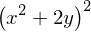

In [17]:
expr**2

In [18]:
expand(expr**2)

In [19]:
x**nu+sigma

You can see from these examples that SymPy does some straightforward simplifications automatically, but exressions are neither factored nor expanded unless explicit commands are given.  There are also several built-in characters which will produce nice LaTeX output.

### Exercise 1

Write $(w+1/3)^3 + (w^2-2w+12)^2 - (w/4)^4$ in expanded polynomial form.

In [20]:
w = symbols('w')

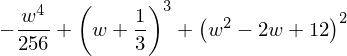

In [21]:
exprtest = (w + S(1)/3)**3 + (w**2 -2*w + 12)**2 - (w/4)**4
exprtest

# Quick Examples of SymPy Capabilities

## Derivatives

In [22]:
diff(exp(x**2), x)

In [23]:
diff(x**7, x)

In [24]:
diff(x**7, x, x)

In [25]:
diff(x**7, x, 3)

In [26]:
diff(x**2 * y**3, x, y)

In [27]:
diff(sin(x)**2, x)

In [28]:
diff(exp(x)*cos(x), x)

In [29]:
x, y, z, t, nu, sigma, a, r, s, Rc, rp = symbols('x y z t nu sigma a r s Rc rp')
#Rc = 30.
#a=10.
#r=10.

integrate((a/(((rp**2. - a**2.)**0.5 ))) * (integrate(rp*s*a / ((rp**2. - a**2.)**1.5 ),  (rp, a, Rc))) , (a,0.,r) )

#integrate( a/((r**2. - a**2.)**(1./2)) * diff((integrate(rp*s/((rp**2. - a**2.)**0.5),  (rp, a, Rc))) , (a)) \
#                         ,(a,0.,r))

KeyboardInterrupt: 

Multiple derivatives can be taken by repeating the variable, or by indicating the order of the derivative with an integer.

### Exercise 2

Find the first and second derivatives of $\frac{1}{\log(w^2+1/2)}$ with respect to $w$.

In [ ]:
diff(1/(log(w**2+1/2)), w)

In [ ]:
diff(1/(log(w**2+1/2)), w, 2)

## Integrals

In [ ]:
integrate(2*x, x)

In [ ]:
integrate(sin(x)*cos(x), x)

In [ ]:
integrate(exp(x)*cos(x)**2, x)

In [ ]:
integrate(y*x*z, x, y)

In [ ]:
integrate(cos(x), (x, 1, 2))

In [ ]:
integrate(exp(-x**2), (x, -oo, oo))

Note that infinity is written as two small 'o' characters.

### Exercise 3

Calculate the following definte integral: $\int_0^{e^4} \log(w) \, \mathrm{d}w$.

In [ ]:
integrate(log(w), (w))

In [ ]:
integrate(log(w), (w ,0,exp(4)))

## Limits

In [ ]:
limit( (x**2 - 1)/(x - 1), x, 1)

In [ ]:
limit( (5*x**4 + 3*x**2)/(2*x**4 - 20*x**3 + 4), x, oo)

In [ ]:
limit( sin(x)/x, x, 0)

In [ ]:
limit(1/x, x, 0, '+')

In [ ]:
limit(1/x, x, 0, '-')

### Exercise 4

Calculate the limit: $$\lim_{w \rightarrow 1} \left(\frac{w}{3w-3} - \frac{1}{3\log w} \right) $$

In [ ]:
limit ((w/(3*w-3))-(1/(3*log(w))),w,1)

## Solving Algebraic Equations

The function `solve()` assumes that the expression is equal to zero unless the SymPy `Eq()` is used.

In [ ]:
solve(x**2 - 9, x)

In [ ]:
solve( x**2 + y*x + z, x)

In [ ]:
solve(10**x - y**3, x)

In [ ]:
solve(tan(x) - y**2, x)

In [ ]:
solve(x**2 + 1, x)

In [ ]:
solve(x**3 + 1, x)

### Exercise 5

Solve the following expression for $w$: $\sqrt{5}w + 3w^2 = 2/7$

In [ ]:
solve(sqrt(5)*w + 3*w**2 - S(2)/7, w)

# Basic Manipulation

## Substitution and Numerical Evaluation

All instances of a variable in an expression can be replaced with the subs() command.

In [ ]:
expr = 4*x**2 + 3*x + 1
expr

In [ ]:
expr.subs(x, 2)

In [ ]:
expr.subs(x, y+z)

In [ ]:
expr = x**2 * y**2 + 3 * x * y**2 + 4*x - 12*z
expr

In [ ]:
expr.subs([(x,3), (y,-1), (z,2)])

The `N()` command is used to evaluate an expression as a floating point number to an arbitrary number of digits.

In [ ]:
expr = sqrt(8)
expr

In [ ]:
N(expr)

In [ ]:
x = S('x')

In [ ]:
expr = sqrt(x)
expr

In [ ]:
N(expr.subs(x, 2))

You can specify how many digits you want:

In [ ]:
N(pi, 100)

### Exercise 6

Find the numerical value of the expression $x^{1/3} + \sqrt{5} x^2 - \log x$ for $x=1,2,\ldots,10$

## Solving Differential Equations

The function `dsolve()` can be used to solve ordinary differential equations after defining `Function` symbols.

In [ ]:
f, g, h = symbols('f g h', cls=Function)

In [ ]:
dsolve(diff(f(x), x) - f(x), f(x))

In [ ]:
dsolve(diff(f(x), x, x) + f(x), f(x))

In [ ]:
dsolve(diff(f(x), x, x) + 3 * diff(f(x), x ) + 6 * f(x), f(x))

There is also a `pdsolve()` for partial differential equations.

In [ ]:
pdsolve(2*diff(f(x,y),x)/f(x,y) + 3*diff(f(x,y), y)/f(x,y) + 1, f(x,y))

### Exercise 7

Solve $f'(x) = f^2(x)$ where $f(1/3) = 5/2$.

## Simplification

The function `simplify()` attempts to give the simplest form of an expression.

In [ ]:
simplify(sin(x)**2 + cos(x)**2)

In [ ]:
simplify((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1))

In [ ]:
simplify(gamma(x)/gamma(x - 2))

Expressions are typically not expanded or factored by `simplify()`, but can be forced to do so by `expand()` and `factor()`.

In [ ]:
expand((x + 1)**4)

In [ ]:
factor(x**2 + 2*x + 1)

`collect()` can be used to group common powers of a given term in an expression.

In [ ]:
collect(4*x**2 + 3*x + 6*z*x**2 + y*x + 1, x)

# Calculus

There are tools for performing calculus operations as well as creating unevaluated derivatives, integrals, and series, which can be evaluated with the `doit()` command.

In [ ]:
deriv = Derivative(exp(x**2*y),x,y)
deriv

In [ ]:
deriv.doit()

In [ ]:
integrate(exp(x)*x**2, x)

In [ ]:
integ = Integral(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))
integ

In [ ]:
integ.doit()

In [ ]:
limit(tan(x)/x, x, 0)

In [ ]:
expr = Limit(sqrt(sin(x))/sqrt(x),x,0)
expr

In [ ]:
expr.doit()

## Series Expansions

SymPy can perform Taylor series expansions of a given function about a specified point to a desired order (which defaults to 6).

In [ ]:
series(exp(x), x, 0, 8)

In [ ]:
expr = atan(x)
expr.series(x, 0)

In [ ]:
series(f(x), x, 1)

In [ ]:
series(exp(1/x), x, oo)

In [ ]:
series(exp(y), y, 0)

In [ ]:
series(1/sin(x), x, 0)

### Exercise 8

Find the series expansion of $\mathrm{sinc}(x)$ about $x=0$

## Linear Algebra

SymPy can also handle symbolic computing of vectors and matrices.

In [ ]:
A = Matrix([[sqrt(2),0],[pi,E]])
A

In [ ]:
y, z, w = S('y, z, w')

In [ ]:
B = Matrix([[x,y],[z,w]])
B

In [ ]:
B.inv()

In [ ]:
B**(-1)

In [ ]:
B**2

In [ ]:
B.T

In [ ]:
3*B

In [ ]:
V = Matrix([2*x,5*z])
V

In [ ]:
B*V

In [ ]:
(V.T)*B

In [ ]:
B.det()

In [ ]:
B.rref()

# Printing

We have so far seen that SymPy can produce nice LaTeX output for easy reading.  It can also produce output which is easily transferrable for other uses.

In [ ]:
expr = Piecewise((x + 1, x > 0), (x, True))
expr

In [ ]:
print(latex(expr))

In [ ]:
print(ccode(expr))

In [ ]:
print(python(expr))

In [ ]:
expr = Eq(x**2 + 2*log(3*y), z)
expr

In [ ]:
print(latex(expr))

In [ ]:
print(ccode(expr))

In [ ]:
expr = Integral(exp(-x**2-y**2), (x, 0, oo), (y, 0, oo))
expr

In [ ]:
print(latex(expr))

In [ ]:
print(python(expr))